## KNN Regression Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## step: 01 Generate synthetic nonlinear regression data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

In [3]:
## step: 02 Manual shuffle and split
total = X.shape[0]
indices = np.random.permutation(total)

train_end = int(0.6 * total)
val_end = int(0.8 * total)

train_idx = indices[:train_end]
val_idx = indices[train_end:val_end]
test_idx = indices[val_end:]

X_train = X[train_idx]
y_train = y[train_idx]
X_val = X[val_idx]
y_val = y[val_idx]
X_test = X[test_idx]
y_test = y[test_idx]


In [8]:
X_train

array([[ 3.03030303],
       [ 5.65656566],
       [ 1.31313131],
       [ 4.14141414],
       [ 0.70707071],
       [ 2.02020202],
       [ 9.5959596 ],
       [ 0.3030303 ],
       [ 4.84848485],
       [ 1.41414141],
       [ 7.97979798],
       [ 1.21212121],
       [ 5.95959596],
       [ 2.62626263],
       [ 3.43434343],
       [ 8.98989899],
       [ 3.93939394],
       [ 6.06060606],
       [ 8.48484848],
       [ 6.36363636],
       [ 4.54545455],
       [ 7.37373737],
       [ 6.46464646],
       [ 4.04040404],
       [ 7.17171717],
       [ 4.94949495],
       [ 8.38383838],
       [ 4.24242424],
       [ 0.90909091],
       [ 2.92929293],
       [ 2.22222222],
       [ 9.7979798 ],
       [ 2.42424242],
       [ 2.72727273],
       [ 6.56565657],
       [ 7.57575758],
       [ 1.71717172],
       [ 7.27272727],
       [ 0.60606061],
       [ 6.86868687],
       [ 4.64646465],
       [ 4.44444444],
       [ 6.66666667],
       [ 2.52525253],
       [ 7.47474747],
       [ 3

In [4]:
## step: 03 KNN Regressor class
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            predictions.append(np.mean(self.y_train[k_indices]))
        return np.array(predictions)


In [5]:

## step: 04 Find best k using validation data
val_errors = []
k_values = range(1, 21)

for k in k_values:
    model = KNNRegressor(k)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    mse = np.mean((y_val_pred - y_val) ** 2)
    val_errors.append(mse)

best_k = k_values[np.argmin(val_errors)]
print(f"Best k found using validation: {best_k}")

Best k found using validation: 3


In [6]:
## step: 05 Test the best model
final_model = KNNRegressor(best_k)
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
test_mse = np.mean((y_test_pred - y_test) ** 2)
print(f"Test MSE with best k={best_k}: {test_mse:.4f}")

Test MSE with best k=3: 0.0476


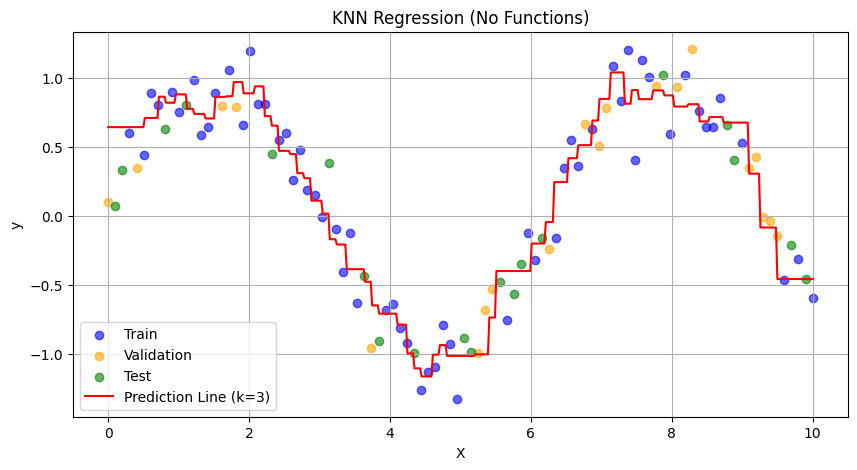

In [7]:
## step: 06 Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.6)
plt.scatter(X_val, y_val, label='Validation', color='orange', alpha=0.6)
plt.scatter(X_test, y_test, label='Test', color='green', alpha=0.6)

X_line = np.linspace(0, 10, 500).reshape(-1, 1)
y_line_pred = final_model.predict(X_line)
plt.plot(X_line, y_line_pred, color='red', label=f'Prediction Line (k={best_k})')

plt.title("KNN Regression (No Functions)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()